In [1]:
import numpy as np
import galsim
import emcee
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
HLR = 1.0
PSF = galsim.Kolmogorov(fwhm=0.6)
scale = 0.2
nx = ny = 64
var = 3e-7  # Approximately SNR of 100
noise = galsim.GaussianNoise(sigma=np.sqrt(var))

In [3]:
def make_data(nu):
    gal = galsim.Spergel(nu, half_light_radius=HLR)
    obj = galsim.Convolve(PSF, gal)
    img = obj.drawImage(nx=nx, ny=ny, scale=scale)
    img.addNoise(noise)    
    return img

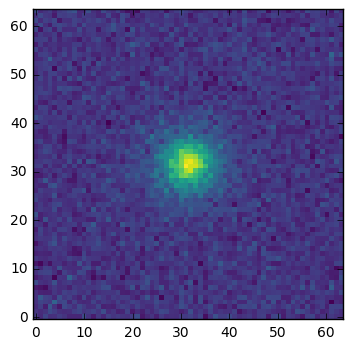

In [4]:
img = make_data(0.5)
plt.imshow(img.array)

In [5]:
def lnlike1(nu1):
    gal = galsim.Spergel(nu1, half_light_radius=HLR)
    obj = galsim.Convolve(PSF, gal)
    model = obj.drawImage(nx=nx, ny=ny, scale=scale)
    return -0.5*np.sum((model.array-img.array)**2/var)

def lnlikelihood(nu):
    return [lnlike1(nu1) for nu1 in nu]

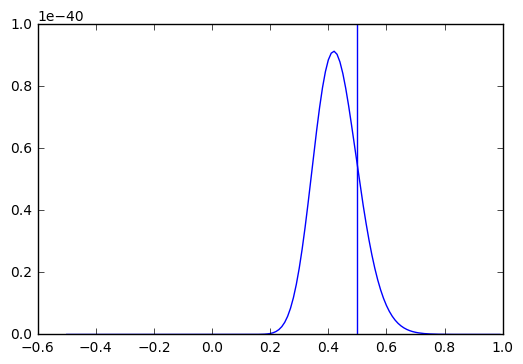

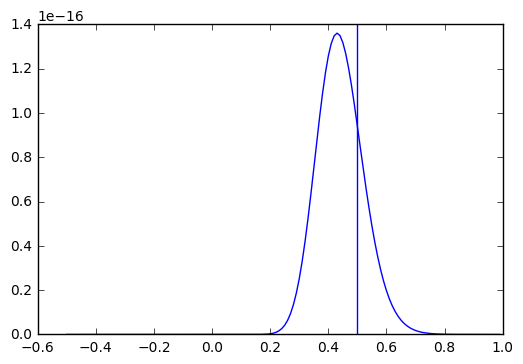

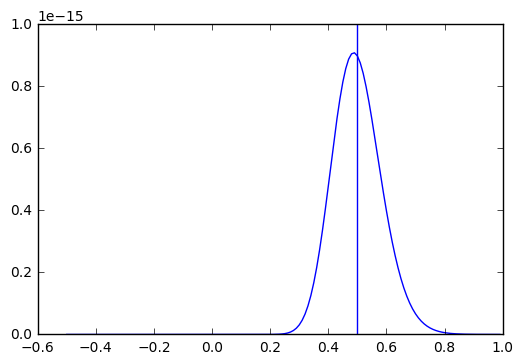

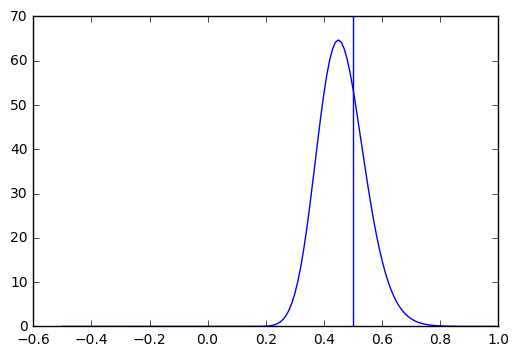

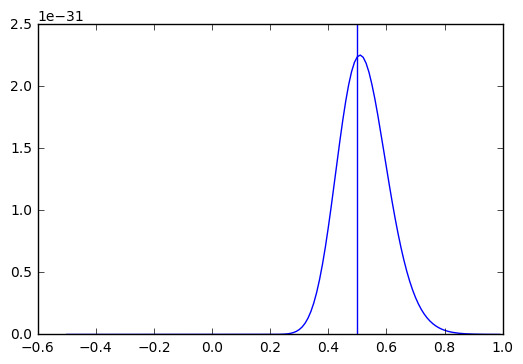

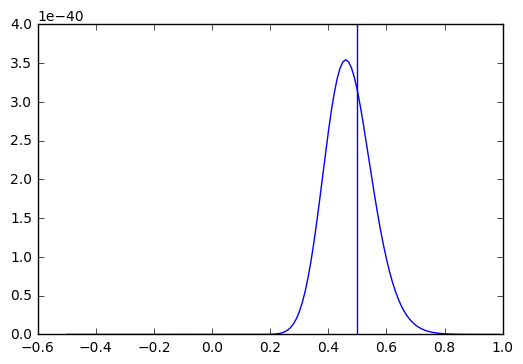

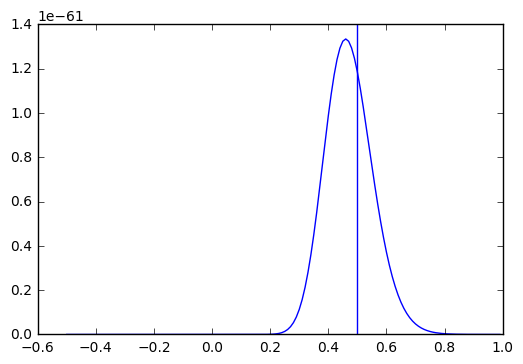

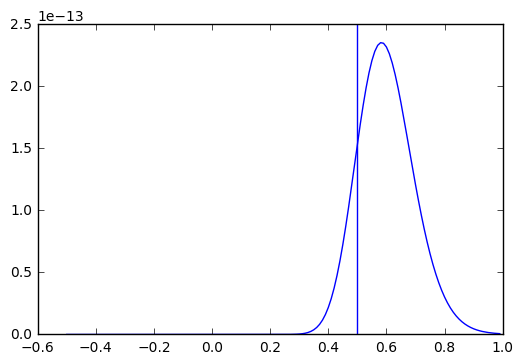

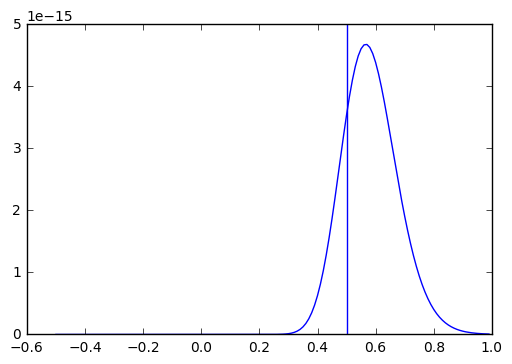

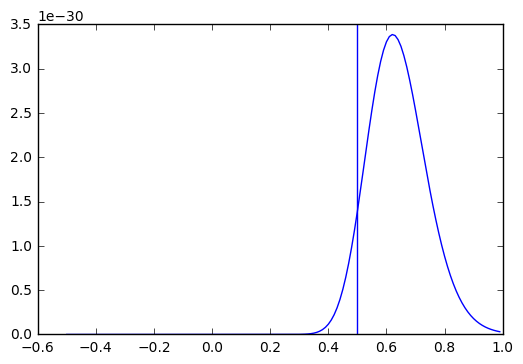

In [6]:
x = np.arange(-0.5, 1.0, 0.01)
for i in range(10):
    img = make_data(0.5)
    plt.plot(x, np.exp(np.array(lnlikelihood(x))+2000))
    plt.axvline(0.5)
    plt.show()